In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

<function matplotlib.pyplot.show(block=None)>

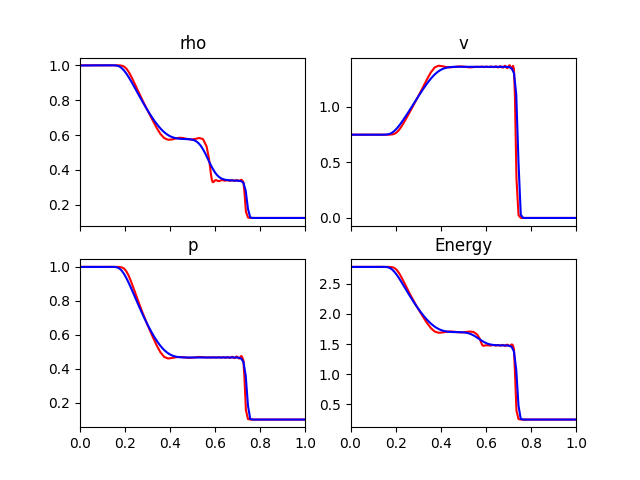

In [8]:
num_main_cells = 100
space_order = 4
time_order = 2
num_ghost_cells_per_side = space_order + time_order
total_num_cells = num_main_cells + 2*num_ghost_cells_per_side
total_num_nodes = total_num_cells + 1
gamma = 1.4

node_position = np.zeros(total_num_nodes)
cell_centre = np.zeros(total_num_cells)
rho = np.zeros(total_num_cells)
rhoV = np.zeros(total_num_cells)
E = np.zeros(total_num_cells)
V = np.zeros(total_num_cells)
epsilon = np.zeros(total_num_cells)
p = np.zeros(total_num_cells)

file_name = "OutputLagrangeWENO4.dat"
file = open(file_name, 'r')
file.readline()
data = file.readline().split(" ")
for i in range(total_num_nodes):
    node_position[i] = float(data[i])
for i in range(total_num_cells):
    cell_centre[i] = 0.5*(node_position[i]+node_position[i+1])
file.readline()
data = file.readline().split(" ")
for i in range(total_num_cells):
    rho[i] = float(data[i])
file.readline()
data = file.readline().split(" ")
for i in range(total_num_cells):
    rhoV[i] = float(data[i])
    V[i] = rhoV[i]/rho[i]
file.readline()
data = file.readline().split(" ")
for i in range(total_num_cells):
    E[i] = float(data[i])
    p[i] = (gamma - 1.0)*(E[i] - 0.5*rho[i]*V[i]*V[i])
    epsilon[i] = (E[i] - 0.5*rho[i]*V[i]*V[i]) / rho[i]
file.close()

space_order = 4
time_order = 2
num_ghost_cells_per_side = space_order + time_order
total_num_cells = num_main_cells + 2*num_ghost_cells_per_side
total_num_nodes = total_num_cells + 1

node_position2 = np.zeros(total_num_nodes)
cell_centre2 = np.zeros(total_num_cells)
rho2 = np.zeros(total_num_cells)
rhoV2 = np.zeros(total_num_cells)
E2 = np.zeros(total_num_cells)
V2 = np.zeros(total_num_cells)
epsilon2 = np.zeros(total_num_cells)
p2 = np.zeros(total_num_cells)

file_name = "OutputLagrangeRemapWENO4.dat"
file = open(file_name, 'r')
file.readline()
data = file.readline().split(" ")
for i in range(total_num_nodes):
    node_position2[i] = float(data[i])
for i in range(total_num_cells):
    cell_centre2[i] = 0.5*(node_position2[i]+node_position2[i+1])
file.readline()
data = file.readline().split(" ")
for i in range(total_num_cells):
    rho2[i] = float(data[i])
file.readline()
data = file.readline().split(" ")
for i in range(total_num_cells):
    rhoV2[i] = float(data[i])
    V2[i] = rhoV2[i]/rho2[i]
file.readline()
data = file.readline().split(" ")
for i in range(total_num_cells):
    E2[i] = float(data[i])
    p2[i] = (gamma - 1.0)*(E2[i] - 0.5*rho2[i]*V2[i]*V2[i])
    epsilon2[i] = (E2[i] - 0.5*rho2[i]*V2[i]*V2[i]) / rho2[i]
file.close()

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)
axs[0, 0].set_xlim(0.0, 1.0)
axs[0, 0].plot(cell_centre, rho, 'r')
axs[0, 0].plot(cell_centre2, rho2, 'b')
axs[0, 0].set_title("rho")
axs[0, 1].plot(cell_centre, V, 'r')
axs[0, 1].plot(cell_centre2, V2, 'b')
axs[0, 1].set_title("v")
axs[1, 0].plot(cell_centre, p, 'r')
axs[1, 0].plot(cell_centre2, p2, 'b')
axs[1, 0].set_title("p")
axs[1, 1].plot(cell_centre, E, 'r')
axs[1, 1].plot(cell_centre2, E2, 'b')
axs[1, 1].set_title("Energy")
plt.show